In [1]:
# The 'or' operater, unstack, stack, groupby, comparisions, plot kind= area, fractions,
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [37]:
c = cast
c = c[(c.character == 'Batman') | (c.character == 'Superman')] # | is the operater for 'or'
c = c.groupby(['year','character']).size()
c = c.unstack().fillna(value = 0)
f = c.Superman > c.Batman
len(f[f])

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [38]:
#c = cast
#c = c[(c.character == 'Batman') | (c.character == 'Superman')]
#c = c.groupby(['year','character']).size()
#c = c.unstack().fillna(value = 0)
#Note: We've already defined c above as only those rows where the character is Superman or Batman and grouped by year
# and character so we don't need to defeine c again
g = c.Superman < c.Batman
len(g[g])

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [58]:
c = cast
c = c.groupby(['year', 'type']).size()
c 
# notice it's graphing 1894 actor, then 1894 actress, then 1899 actor, and son. That's why it's up and down so much
# c.plot()

year  type   
1894  actor           2
      actress         1
1899  actor           6
1900  actor           2
1905  actor           1
1906  actor          14
      actress         3
1907  actor           5
1908  actor          29
      actress        13
1909  actor           3
1910  actor          51
      actress        26
1911  actor         136
      actress        64
1912  actor         241
      actress       148
1913  actor         650
      actress       342
1914  actor        2227
      actress      1149
1915  actor        3426
      actress      2011
1916  actor        4830
      actress      2830
1917  actor        5218
      actress      3058
1918  actor        4879
      actress      2806
1919  actor        4917
                  ...  
2006  actress     29082
2007  actor       56255
      actress     31074
2008  actor       62901
      actress     34868
2009  actor       74615
      actress     41262
2010  actor       73160
      actress     39179
2011  actor       79656
  

In [59]:

c = c.unstack('type') # this unstacks the index from above, creating a bunch of coordinate pairs. (1894,2)(1899,6)..
c 

type,actor,actress
year,,
1894,2.0,1.0
1899,6.0,NaN
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN
1908,29.0,13.0
1909,3.0,NaN
1910,51.0,26.0


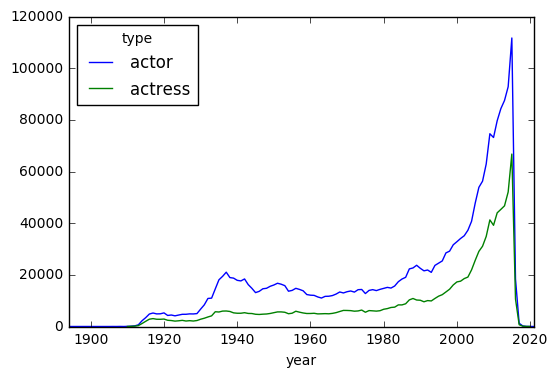

In [56]:
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

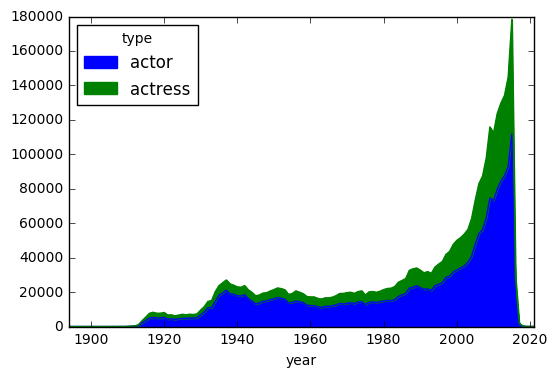

In [60]:
c.plot(kind = 'area') # NOTE: this puts the two values on top of each other. 
# It shows green is Smaller than blue, or is supposed to.

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

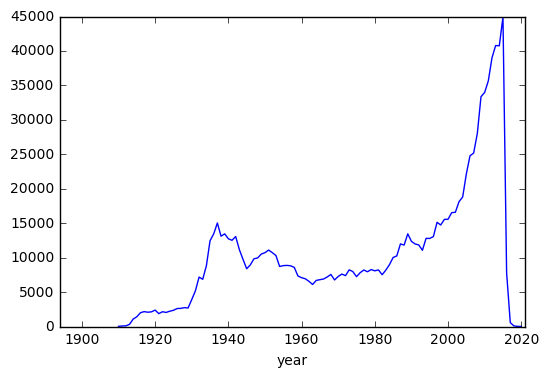

In [62]:
(c.actor - c.actress).plot() # this finds the values first then sees if they can be plotted, see below
# NOT c.plot(c.actor - c.actress)

In [63]:
c.actor - c.actress

year
1894        1.0
1899        NaN
1900        NaN
1905        NaN
1906       11.0
1907        NaN
1908       16.0
1909        NaN
1910       25.0
1911       72.0
1912       93.0
1913      308.0
1914     1078.0
1915     1415.0
1916     2000.0
1917     2160.0
1918     2073.0
1919     2127.0
1920     2382.0
1921     1869.0
1922     2143.0
1923     2041.0
1924     2221.0
1925     2349.0
1926     2606.0
1927     2632.0
1928     2740.0
1929     2688.0
1930     3906.0
1931     5175.0
         ...   
1992    11841.0
1993    11063.0
1994    12794.0
1995    12783.0
1996    13057.0
1997    15120.0
1998    14738.0
1999    15546.0
2000    15566.0
2001    16525.0
2002    16584.0
2003    18123.0
2004    18805.0
2005    22159.0
2006    24785.0
2007    25181.0
2008    28033.0
2009    33353.0
2010    33981.0
2011    35653.0
2012    38997.0
2013    40785.0
2014    40749.0
2015    44936.0
2016     7770.0
2017      562.0
2018       82.0
2019       17.0
2020       11.0
2021        NaN
dtype: float64

### 

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

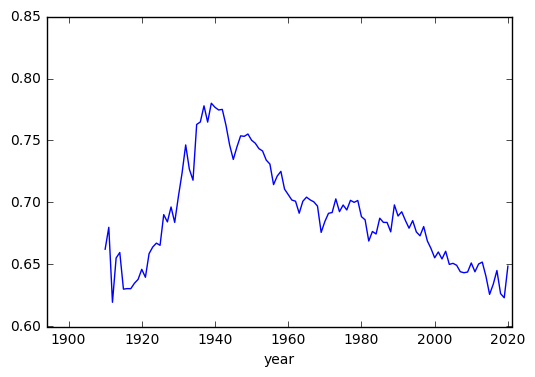

In [66]:
(c.actor / (c.actor + c.actress)).plot() # Fractions: 14 actors and 3 actresses. The fraction of actors is 
# 14 / 14+3. The denominator is the total choices or options.

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [99]:
c = cast
c = c[c.n == 2] # We only want to look at n=2 rows or roles

c = c.groupby(['year', 'type']).size() 
c = c.unstack('type')#.fillna(0)# It looks terrible when you do fillna(0)
#c


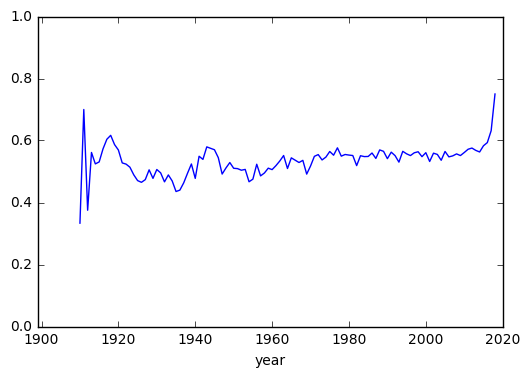

In [100]:
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1],)

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

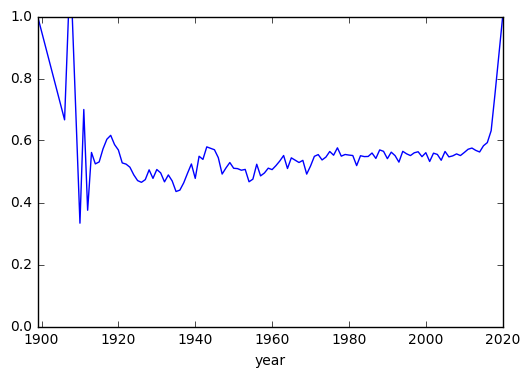

In [105]:
c = cast
c = c[c.n == 2] # We only want to look at n=2 rows or roles

c = c.groupby(['year', 'type']).size() 
c = c.unstack('type').fillna(0)## Ike, why does making the NaN values = to 0 give different values for the plot?
# What happens when Python runs 2 / (2+NaN)?
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1],)